In [97]:
import pandas as pd
import os   

# Directory where your Excel files are located
directory = './G_MAP_DATA'

# List to store DataFrames
dfs = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.xlsx'):  # Check if the file is an Excel file
        file_path = os.path.join(directory, filename)
        # Read Excel file into DataFrame and append to list
        dfs.append(pd.read_excel(file_path))

# Concatenate all DataFrames in the list
combined_df = pd.concat(dfs, ignore_index=True)

combined_df_no_duplicates = combined_df.drop_duplicates()
# Define the path where you want to save the combined Excel file
output_file = 'combined_data.xlsx'

# Save the combined DataFrame without duplicates to Excel
combined_df_no_duplicates.to_excel(output_file, index=False)
print(combined_df_no_duplicates)

print("Combined data saved to:", output_file)


                                business_id  phone_number  \
0     0x403081dbc3666445:0x7abc1bdfb4bd1dff  9.941260e+11   
1     0x403085547b01239f:0x7f198090f0c34e8d  9.941256e+11   
2     0x403085c4e3d28fe5:0x48bb9eed91395ec7           NaN   
3     0x40308529040c419f:0x82b53faacffd0598  9.941250e+11   
4     0x403085c5c53e51a7:0x523d1f5e483f8bf0           NaN   
...                                     ...           ...   
5019  0x40307d002743f3bb:0x4e0b8f8a9cb51a7d           NaN   
5020  0x40307d747a46272d:0xae1da0150f2ad206  9.945535e+11   
5021  0x40307db267672c9f:0xf9ab220e599938b4  9.945029e+11   
5022  0x40307d38c171810b:0x712ad37870d43b0e  9.947777e+11   
5023  0x40308fd968e02fab:0x302aa9fcf7990757           NaN   

                                  name  \
0          Kapital Bank ATM (Bankomat)   
1           Expressbank ATM (Bankomat)   
2     Azərbaycan Beynelxalq Bank (ATM)   
3           Yelo Bank - ATM - Bankomat   
4                     Kapital Bank ATM   
...            

In [61]:
data

,name,latitude,longitude,review_count,rating,types,city
0,Kapital Bank ATM (Bankomat),40.407035,49.712947,1.0,5.0,ATM,"Qobu, Azerbaijan"
2,Azərbaycan Beynelxalq Bank (ATM),40.454472,49.745076,4.0,4.5,ATM,"Baku, Azerbaijan"
3,Yelo Bank - ATM - Bankomat,40.456623,49.741645,1.0,1.0,ATM,"Baku, Azerbaijan"
4,Kapital Bank ATM,40.455749,49.740418,2.0,2.5,ATM,"Khirdalan, Azerbaijan"
5,Kapital Bank ATM (Bankomat),40.461162,49.727679,8.0,3.8,ATM,"Khirdalan, Azerbaijan"
...,...,...,...,...,...,...,...
1988,Hangover Restoran,40.376376,49.845382,3.0,4.7,"Restaurant, Travel lounge","Baku, Azerbaijan"
1989,Secrets Pub,40.415556,49.837192,7.0,5.0,Restaurant,"Baku, Azerbaijan"
1990,Seyri Restoran,40.401441,49.870313,3.0,3.7,Azerbaijani restaurant,"Baku, Azerbaijan"
1991,Icon de Louvre,40.401328,49.845562,15.0,4.5,Restaurant,"Baku, Azerbaijan"


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

data = pd.read_excel('combined_data.xlsx')
missing_city = data['city'].isnull()
data['is_Azerbaijan'] = 0
data.loc[(data['city'].str.contains('Azerbaijan', case=False, na=False)) & (~missing_city), 'is_Azerbaijan'] = 1
data = data[data['is_Azerbaijan'] == 1][['name', 'latitude', 'longitude', 'review_count', 'rating', 'types', 'city']]
data = data.drop_duplicates()
data = data.dropna()
# Geographical Distribution with Folium Map
map = folium.Map(location=[40.4093, 49.8671], zoom_start=10)
for index, row in data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(map)
map.save('business_map.html')

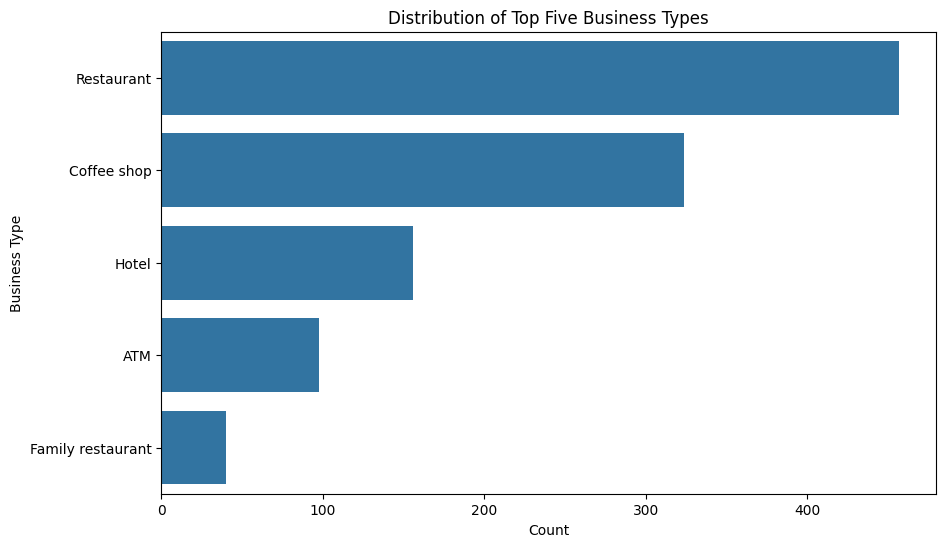

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

data = pd.read_excel('combined_data.xlsx')
missing_city = data['city'].isnull()
data['is_Azerbaijan'] = 0
data.loc[(data['city'].str.contains('Azerbaijan', case=False, na=False)) & (~missing_city), 'is_Azerbaijan'] = 1
data = data[data['is_Azerbaijan'] == 1][['name', 'latitude', 'longitude', 'review_count', 'rating', 'types', 'city']]
data = data.drop_duplicates()
data = data.dropna()
# Top five business types
top_five_types = data['types'].value_counts().nlargest(5).index

# Filter data for top five types
data_top_five = data[data['types'].isin(top_five_types)]


# Distribution of Top Five Business Types
plt.figure(figsize=(10, 6))
sns.countplot(y='types', data=data_top_five, order=data_top_five['types'].value_counts().index)
plt.title('Distribution of Top Five Business Types')
plt.xlabel('Count')
plt.ylabel('Business Type')
plt.show()

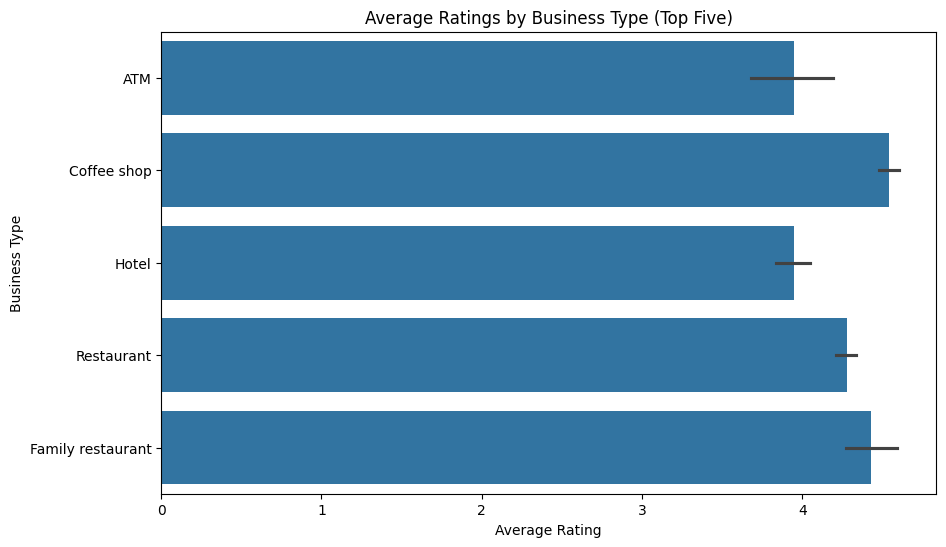

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('combined_data.xlsx')
missing_city = data['city'].isnull()
data['is_Azerbaijan'] = 0
data.loc[(data['city'].str.contains('Azerbaijan', case=False, na=False)) & (~missing_city), 'is_Azerbaijan'] = 1
data = data[data['is_Azerbaijan'] == 1][['name', 'latitude', 'longitude', 'review_count', 'rating', 'types', 'city']]
data = data.drop_duplicates()
data = data.dropna()
# Top five business types
top_five_types = data['types'].value_counts().nlargest(5).index

# Filter data for top five types
data_top_five = data[data['types'].isin(top_five_types)]

# Average Ratings by Business Type (Top Five)
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='types', data=data_top_five)
plt.title('Average Ratings by Business Type (Top Five)')
plt.xlabel('Average Rating')
plt.ylabel('Business Type')
plt.show()

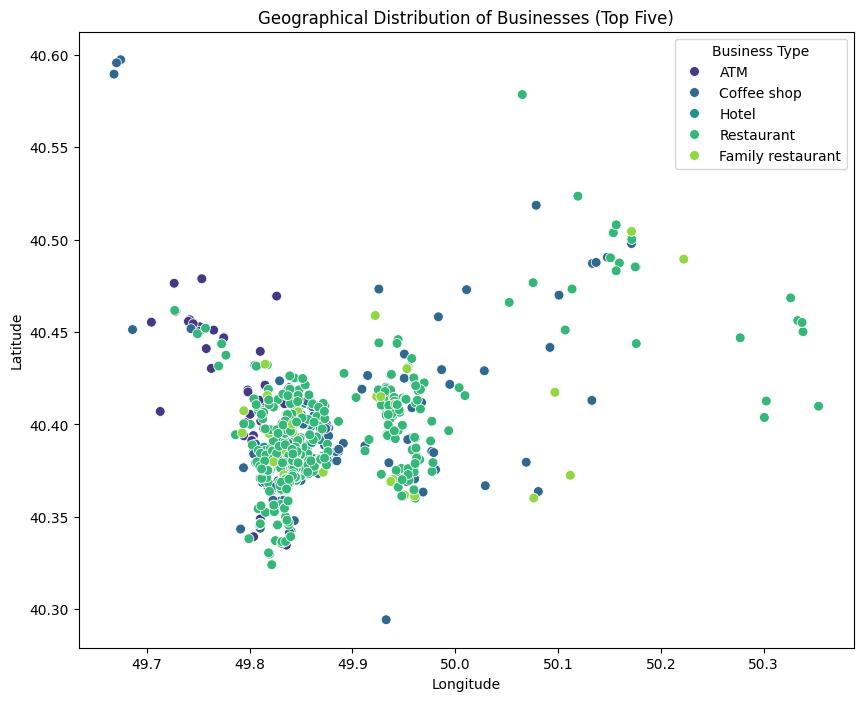

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

data = pd.read_excel('combined_data.xlsx')
missing_city = data['city'].isnull()
data['is_Azerbaijan'] = 0
data.loc[(data['city'].str.contains('Azerbaijan', case=False, na=False)) & (~missing_city), 'is_Azerbaijan'] = 1
data = data[data['is_Azerbaijan'] == 1][['name', 'latitude', 'longitude', 'review_count', 'rating', 'types', 'city']]
data = data.drop_duplicates()
data = data.dropna()
# Top five business types
top_five_types = data['types'].value_counts().nlargest(5).index

# Filter data for top five types
data_top_five = data[data['types'].isin(top_five_types)]


# Geographical Distribution of Businesses (Top Five)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=data_top_five, hue='types', palette='viridis', legend='full', s=50)
plt.title('Geographical Distribution of Businesses (Top Five)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Business Type', loc='upper right')
plt.show()

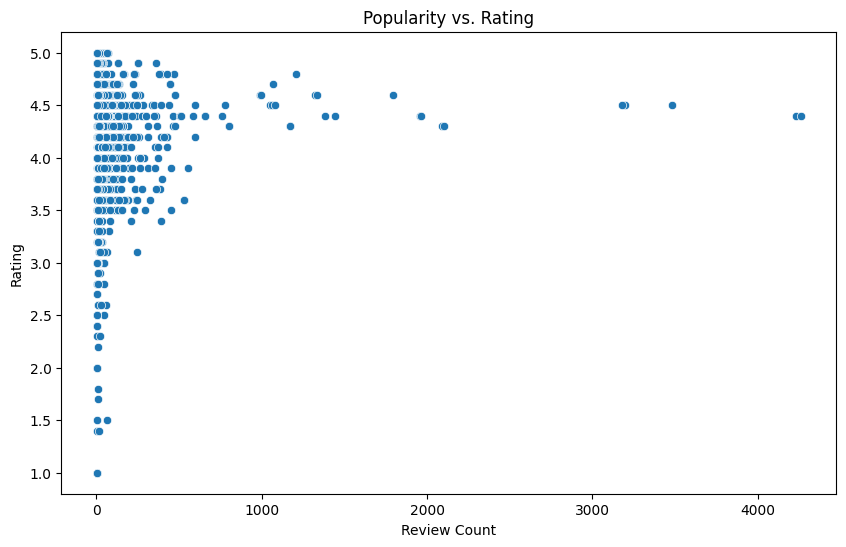

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('combined_data.xlsx')
missing_city = data['city'].isnull()
data['is_Azerbaijan'] = 0
data.loc[(data['city'].str.contains('Azerbaijan', case=False, na=False)) & (~missing_city), 'is_Azerbaijan'] = 1
data = data[data['is_Azerbaijan'] == 1][['name', 'latitude', 'longitude', 'review_count', 'rating', 'types', 'city']]
data = data.drop_duplicates()
data = data.dropna()


# Popularity vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='rating', data=data)
plt.title('Popularity vs. Rating')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()

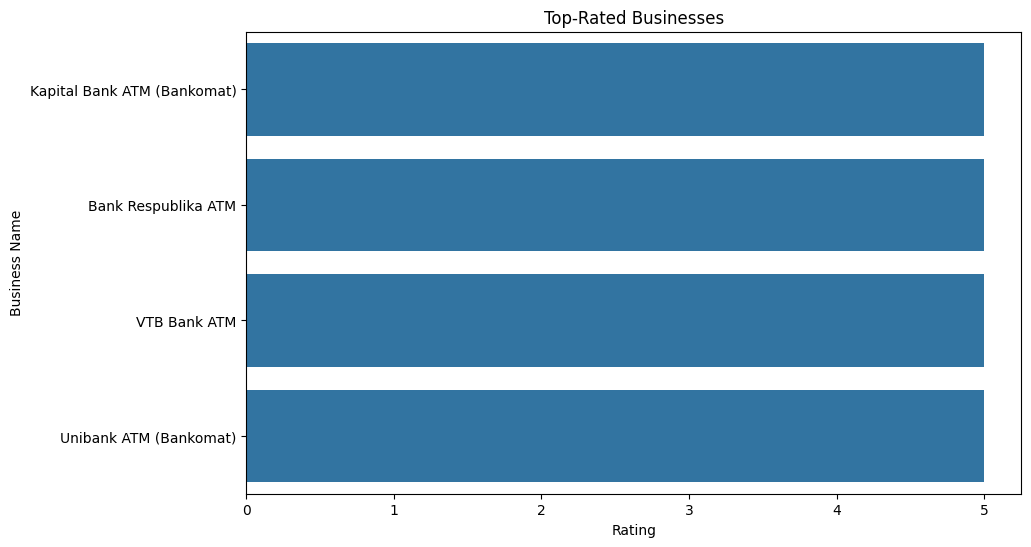

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('combined_data.xlsx')
missing_city = data['city'].isnull()
data['is_Azerbaijan'] = 0
data.loc[(data['city'].str.contains('Azerbaijan', case=False, na=False)) & (~missing_city), 'is_Azerbaijan'] = 1
data = data[data['is_Azerbaijan'] == 1][['name', 'latitude', 'longitude', 'review_count', 'rating', 'types', 'city']]
data = data.drop_duplicates()
data = data.dropna()
# Top-Rated Businesses
top_rated = data.nlargest(10, 'rating')
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='name', data=top_rated)
plt.title('Top-Rated Businesses')
plt.xlabel('Rating')
plt.ylabel('Business Name')
plt.show()



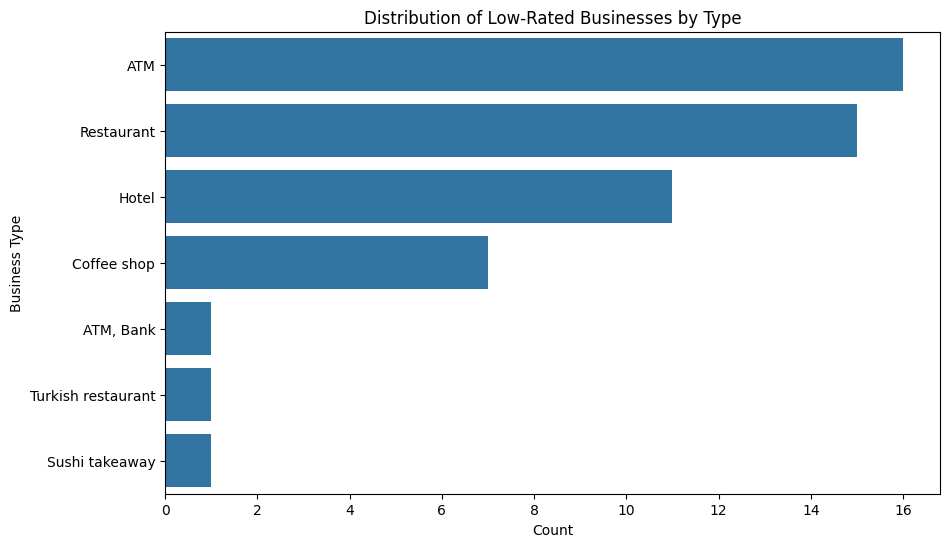

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('combined_data.xlsx')
missing_city = data['city'].isnull()
data['is_Azerbaijan'] = 0
data.loc[(data['city'].str.contains('Azerbaijan', case=False, na=False)) & (~missing_city), 'is_Azerbaijan'] = 1
data = data[data['is_Azerbaijan'] == 1][['name', 'latitude', 'longitude', 'review_count', 'rating', 'types', 'city']]
data = data.drop_duplicates()
data = data.dropna()
# Businesses with Low Ratings
low_rated = data[data['rating'] < 3]
plt.figure(figsize=(10, 6))
sns.countplot(y='types', data=low_rated, order=low_rated['types'].value_counts().index)
plt.title('Distribution of Low-Rated Businesses by Type')
plt.xlabel('Count')
plt.ylabel('Business Type')
plt.show()


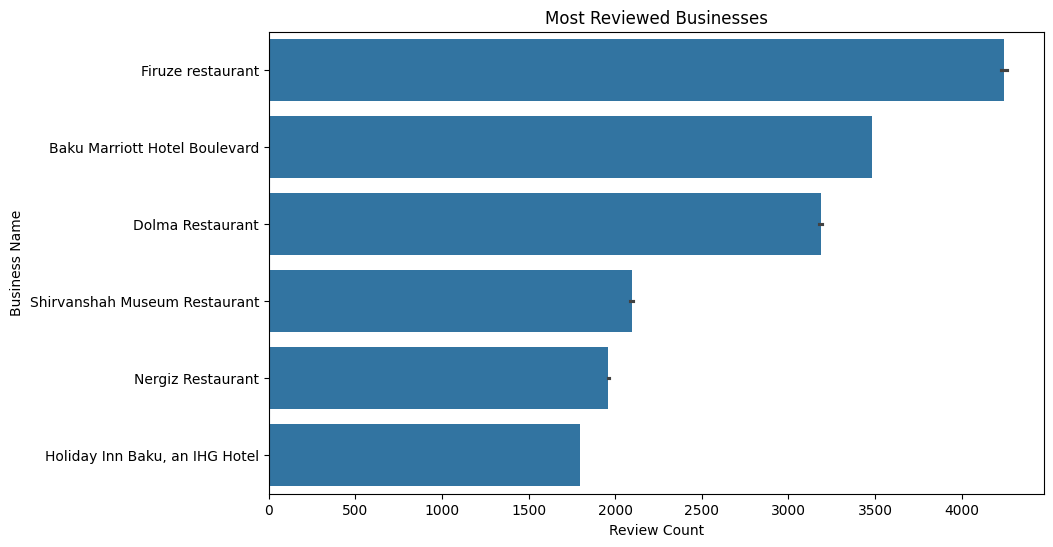

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

data = pd.read_excel('combined_data.xlsx')
missing_city = data['city'].isnull()
data['is_Azerbaijan'] = 0
data.loc[(data['city'].str.contains('Azerbaijan', case=False, na=False)) & (~missing_city), 'is_Azerbaijan'] = 1
data = data[data['is_Azerbaijan'] == 1][['name', 'latitude', 'longitude', 'review_count', 'rating', 'types', 'city']]
data = data.drop_duplicates()
data = data.dropna()
# Most Reviewed Businesses
most_reviewed = data.nlargest(10, 'review_count')
plt.figure(figsize=(10, 6))
sns.barplot(x='review_count', y='name', data=most_reviewed)
plt.title('Most Reviewed Businesses')
plt.xlabel('Review Count')
plt.ylabel('Business Name')
plt.show()

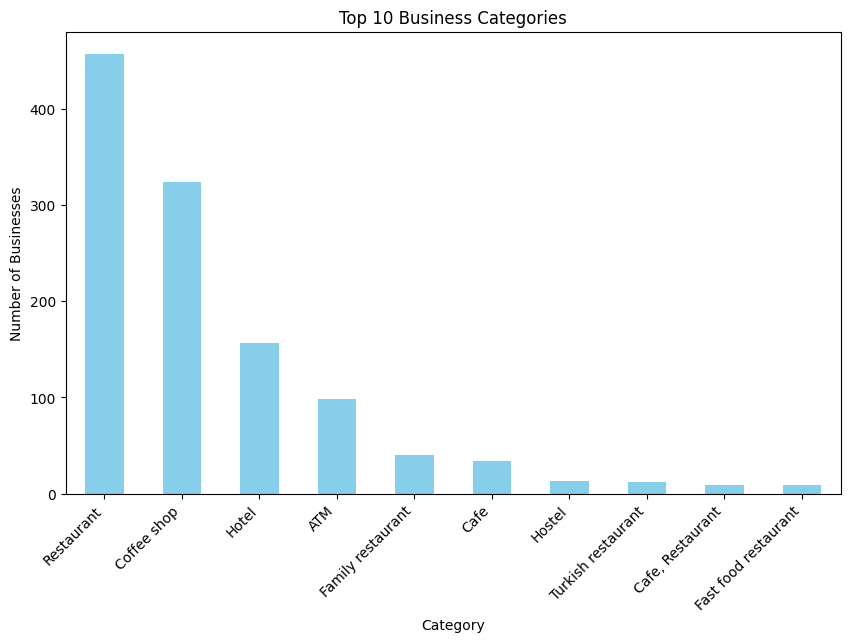

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('combined_data.xlsx')
missing_city = data['city'].isnull()
data['is_Azerbaijan'] = 0
data.loc[(data['city'].str.contains('Azerbaijan', case=False, na=False)) & (~missing_city), 'is_Azerbaijan'] = 1
data = data[data['is_Azerbaijan'] == 1][['name', 'latitude', 'longitude', 'review_count', 'rating', 'types', 'city']]
data = data.drop_duplicates()
data = data.dropna()
# Count the number of businesses in each category
category_counts = data['types'].value_counts()

# Visualize the distribution of businesses by category
plt.figure(figsize=(10, 6))
category_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Business Categories')
plt.xlabel('Category')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45, ha='right')
plt.show()


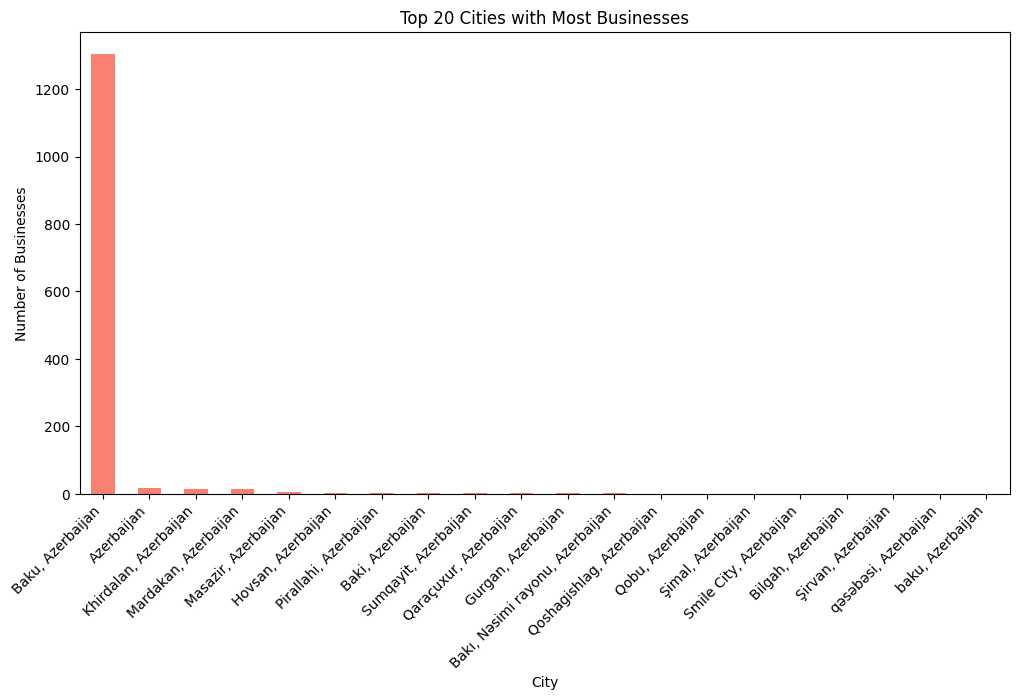

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('combined_data.xlsx')
missing_city = data['city'].isnull()
data['is_Azerbaijan'] = 0
data.loc[(data['city'].str.contains('Azerbaijan', case=False, na=False)) & (~missing_city), 'is_Azerbaijan'] = 1
data = data[data['is_Azerbaijan'] == 1][['name', 'latitude', 'longitude', 'review_count', 'rating', 'types', 'city']]
data = data.drop_duplicates()
data = data.dropna()
# Analyze the distribution of businesses by city
city_counts = data['city'].value_counts()

# Visualize the distribution of businesses by city
plt.figure(figsize=(12, 6))
city_counts.head(20).plot(kind='bar', color='salmon')
plt.title('Top 20 Cities with Most Businesses')
plt.xlabel('City')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45, ha='right')
plt.show()


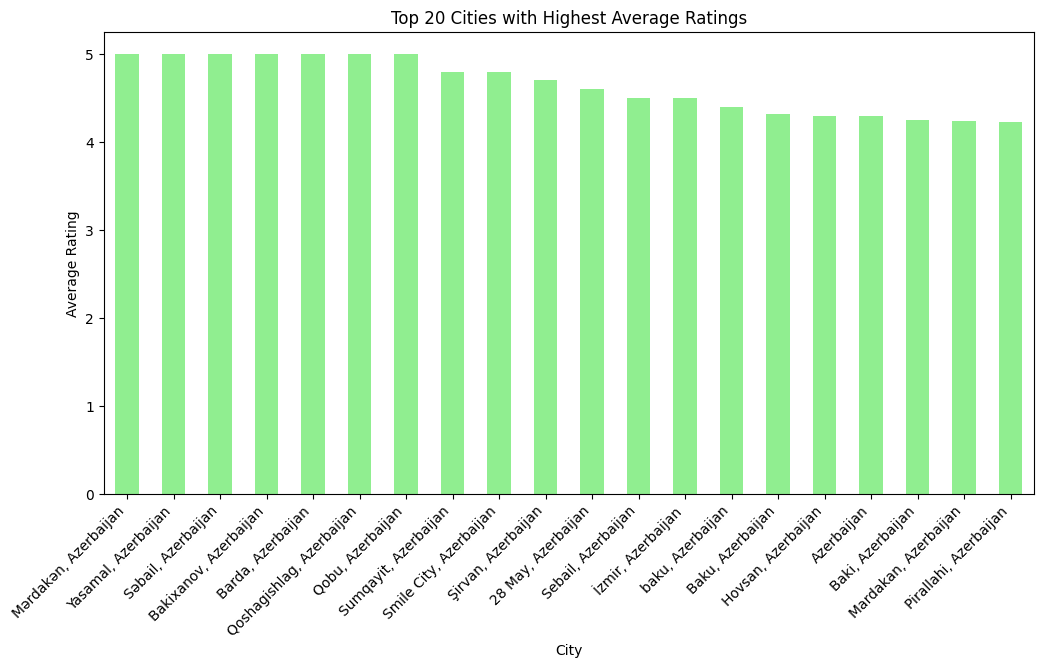

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('combined_data.xlsx')
missing_city = data['city'].isnull()
data['is_Azerbaijan'] = 0
data.loc[(data['city'].str.contains('Azerbaijan', case=False, na=False)) & (~missing_city), 'is_Azerbaijan'] = 1
data = data[data['is_Azerbaijan'] == 1][['name', 'latitude', 'longitude', 'review_count', 'rating', 'types', 'city']]
data = data.drop_duplicates()
data = data.dropna()
# Group businesses by city and calculate average ratings
city_avg_rating = data.groupby('city')['rating'].mean().sort_values(ascending=False)

# Visualize average ratings by city
plt.figure(figsize=(12, 6))
city_avg_rating.head(20).plot(kind='bar', color='lightgreen')
plt.title('Top 20 Cities with Highest Average Ratings')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

